In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift,ifftshift,ifft2

# Loading Image Gray Scale

(256, 192)


Text(0.5, 1.0, 'Original Scan')

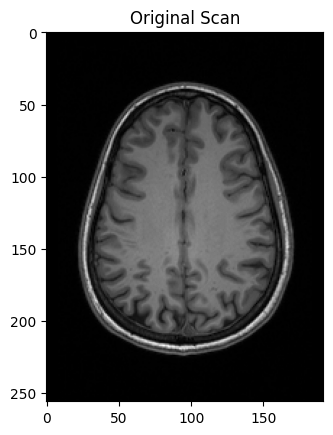

In [2]:
# Load an image
# image = plt.imread(r'F:\FYP\FYP\brats_png\5.png')[:,:,1]


# image = plt.imread(r"F:\FYP\FIgshare_Dataset\Suitable_Images\67.png")
image = plt.imread('F:\FYP\FYP\MRART_png_scans\scan_000103\standard_000103_png.png')
# print(np.max(image1))
# print(np.min(image1))
# image = plt.imread(r"C:\Users\Milan\Desktop\generated_y\BraTS-GLI-00000-000_t2f_slice_89.png")
# image = np.pad(image, ((32, 32), (0, 0)), mode='constant', constant_values=0)

# image = cv2.resize(image, (512,512))
image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
print(image.shape)
plt.imshow(image,cmap="gray")
plt.title('Original Scan')

# Helper Functions

In [3]:
def fourier_transform(image):
    if len(image.shape) == 3:
        image = np.mean(image, axis=-1)

    # Perform 2D Fourier Transform
    fft_result = fft2(image)

    # Shift zero frequency components to the center
    fft_result_shifted = fftshift(fft_result)

    # Calculate the magnitude spectrum (log scale for better visualization)
    magnitude_spectrum = np.log(np.abs(fft_result_shifted) + 1)

    return magnitude_spectrum,fft_result_shifted

def inverse_fourier(fft_result_shifted):
    # Inverse shift to prepare for inverse Fourier transform
    fft_result_unshifted_masked = ifftshift(fft_result_shifted)
    # Inverse Fourier Transform
    original_filtered = np.abs(ifft2(fft_result_unshifted_masked))
    return original_filtered


def add_rotation(angle, image):
    # Define the rotation angle (in degrees)

    # Get the center of the image
    height, width = image.shape[:2]
    center = (width / 2, height / 2)

    # Define the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Apply the rotation to the image
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

    return rotated_image

def add_translation(shift_x, shift_y, image):
    # Define the rotation angle (in degrees)

    height, width = image.shape[:2]

    # Define the translation matrix
    translation_matrix = np.float32([[1, 0, shift_x], [0, 1, shift_y]])

    # Apply the translation to the rotated image
    shifted_image = cv2.warpAffine(image, translation_matrix, (width, height))

    return shifted_image
        

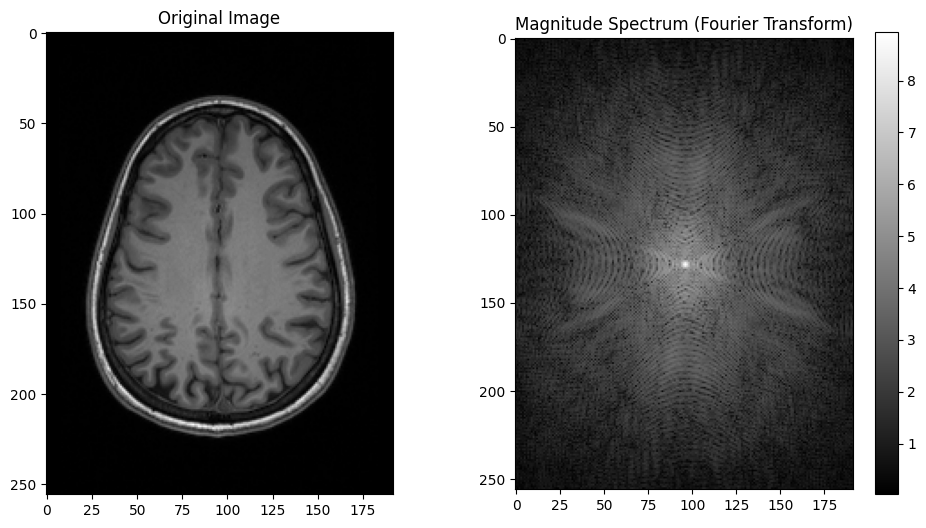

In [4]:

magnitude_spectrum,fft_result_shifted = fourier_transform(image)
# Display the original image and its Fourier Transform
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum (Fourier Transform)')
plt.colorbar()

# Adding Rotation or Translation

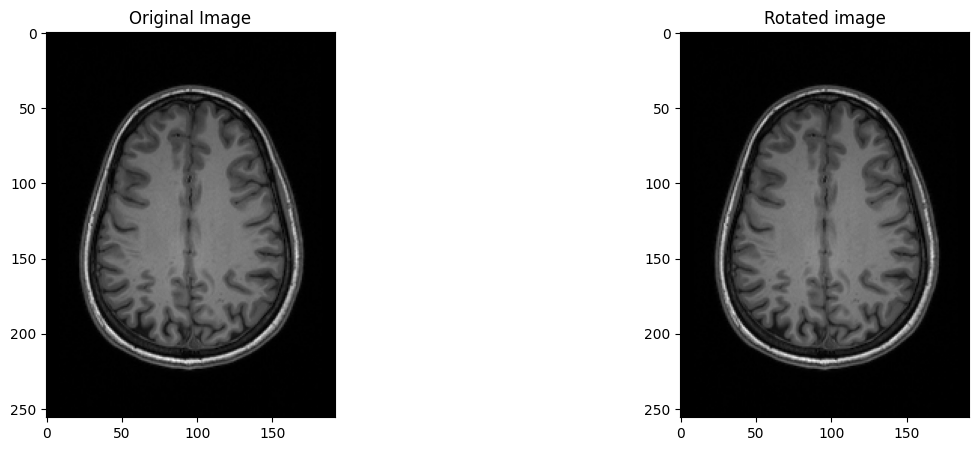

In [5]:
import cv2
import numpy as np
# Load your image
# image = cv2.imread('your_image_path.jpg')

angle = 7
# rotated_image = add_rotation(angle,image)
rotated_image = add_translation(1,0,image)
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(rotated_image, cmap='gray')
plt.title('Rotated image')
plt.show()

Text(0.5, 1.0, 'Rotated magnitude spectrum')

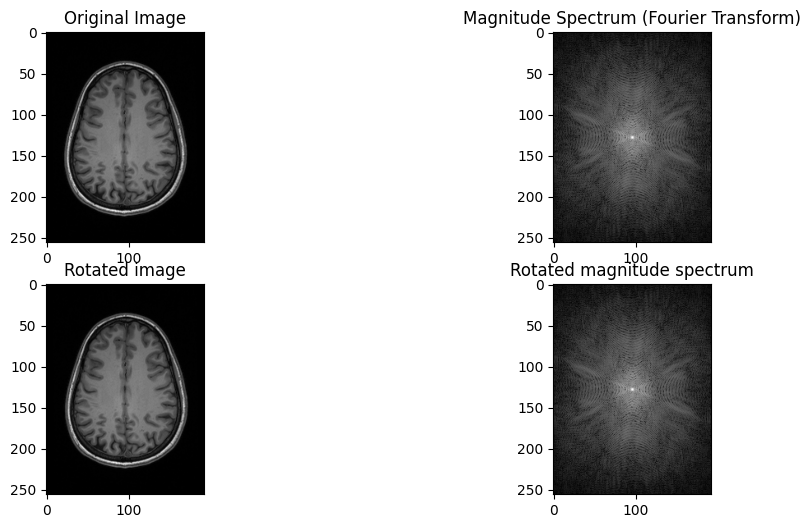

In [6]:
rotated_magnitude_spectrum,rotated_fft_result_shifted = fourier_transform(rotated_image)
# Display the original image and its Fourier Transform
plt.figure(figsize=(12, 6))

plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(222)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum (Fourier Transform)')

plt.subplot(223)
plt.imshow(rotated_image, cmap='gray')
plt.title('Rotated image')

plt.subplot(224)
plt.imshow(rotated_magnitude_spectrum, cmap='gray')
plt.title('Rotated magnitude spectrum')

# Motion simulation 1 

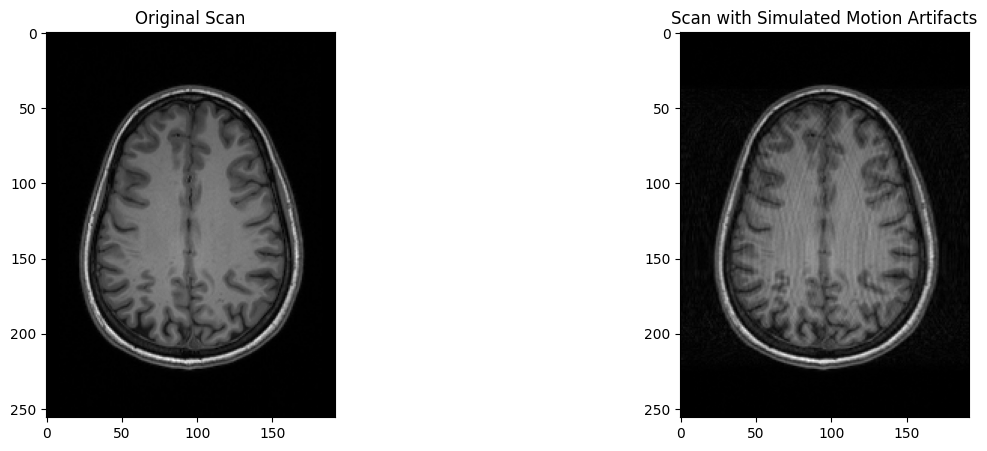

In [7]:
number_of_lines = 100 # Define the number of lines to be Sampled from
width = 1
# line_indexes = np.linspace(0, rotated_image.shape[1]-2, number_of_lines).astype(int)
line_indexes = np.random.randint(0, rotated_image.shape[1]-2, number_of_lines)

motion_corrupted = fft_result_shifted

for i in line_indexes:
    extracted = rotated_fft_result_shifted[:,i:i+width]
    motion_corrupted[:,i:i+width] = extracted
    # extracted = rotated_fft_result_shifted[i:i+width,:]
    # motion_corrupted[i:i+width,:] = extracted

inverse_fourier_corrupted = inverse_fourier(motion_corrupted)
# inverse_fourier_corrupted = add_rotation(angle,inverse_fourier_corrupted)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Scan')

plt.subplot(122)
plt.imshow(inverse_fourier_corrupted, cmap='gray')
plt.title('Scan with Simulated Motion Artifacts')
plt.show()

#3,50,5

#When rotating increasing the width causes blurring, which is not the correct effect of artifacts. keep the width 1 or 2 maybe around that, Then inrease the number of lines.
#It correcltly reflect the ghosting effect (wave like structures). To get more thin ghosting lines reduce the angle

#angle =7
# number_of_lines = 7
#width = 3 >>>>>>> best for MRART

#angle =7 (4 for much thin lines)
# number_of_lines = 50
#width = 1 >>>>>>> best for Figshare

#angle =7
# number_of_lines = 20
#width = 1 >>>>>>> also good

#For BRATS
# angle = 7
# number of lines = 20
# Width = 5 >> better (Doest have the ghosting effect properly)

# Creating set of images with different noise levels

In [ ]:
for number_of_lines in range(10,100,1):
    rotated_image2 = add_translation(1,0,image)
    width = 1
    line_indexes = np.random.randint(0, rotated_image.shape[1]-2, number_of_lines)
    print(number_of_lines)
    motion_corrupted = fft_result_shifted.copy()
    for i in line_indexes:
        extracted = rotated_fft_result_shifted[:,i:i+width]
        motion_corrupted[:,i:i+width] = extracted
        # extracted = rotated_fft_result_shifted[i:i+width,:]
        # motion_corrupted[i:i+width,:] = extracted

    inverse_fourier_corrupted = inverse_fourier(motion_corrupted)
    # plt.imshow(inverse_fourier_corrupted,cmap='gray')
    # plt.show()
    plt.imsave(f"F:\FYP\Different_noise_levels\{number_of_lines}.png",inverse_fourier_corrupted,cmap="gray")